In [29]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

from aart_func import *
import params
from params import * # The file params.py contains all the relevant parameters for the simulations

import kgeo
import fileloading

# Computation of the lensing bands

In [2]:
%time !python3 lensingbands.py

Welcome to eht-imaging! v 1.2.7 

/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
Computing the lensing bands
Number of points in the n=0 grid  4000000
Number of points in the n=1 grid  4000000
Number of points in the n=2 grid  4000000
File  /scratch/gpfs/td6241/aart/rawResults/LensingBands_a_0.9375_i_17.h5  created.
CPU times: user 409 ms, sys: 70.5 ms, total: 479 ms
Wall time: 48.3 s


## Reading the output of the lensing bands calculation

In [9]:
# fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)
fnbands= path + "LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])
supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])
supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()

Reading file:  /scratch/gpfs/td6241/aart/rawResults/LensingBands_a_0.9375_i_17.h5


## Plotting the lensing bands
Let us now plot the boundaries of the lensing bands and just the grid points of the n=1 lensing band.



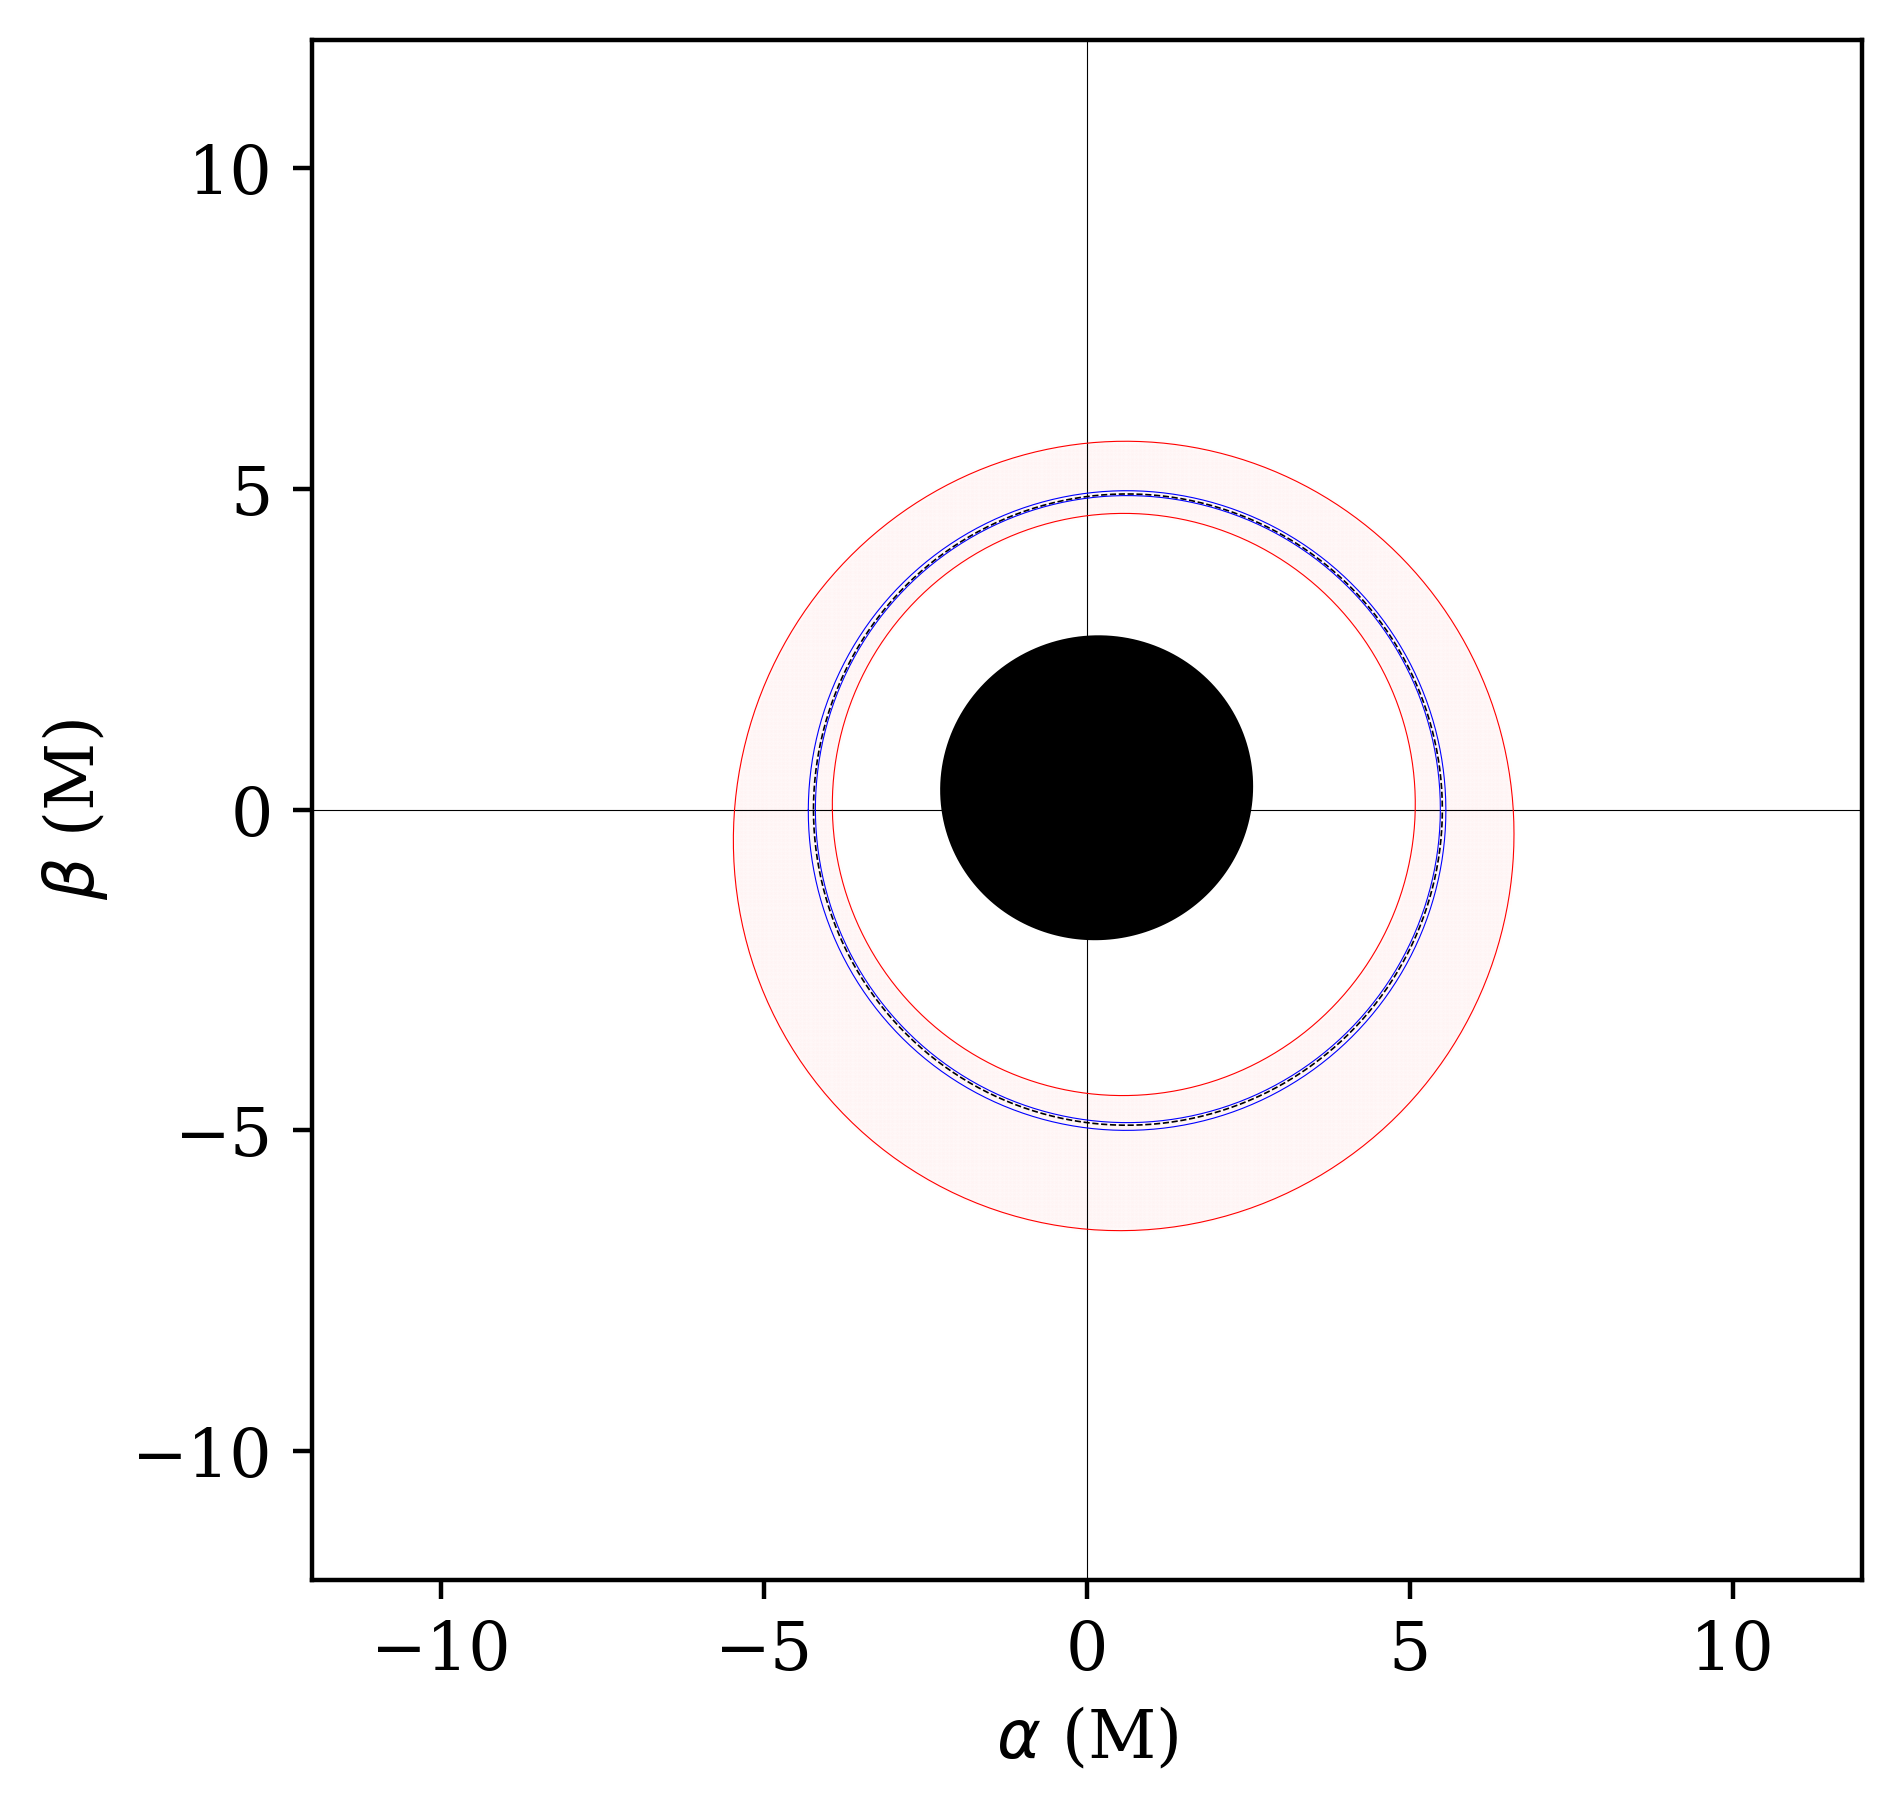

In [12]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)
ax.plot(hull_2i[:,0],hull_2i[:,1],'b',linewidth=0.2)
ax.plot(hull_2e[:,0],hull_2e[:,1],'b',linewidth=0.2)

#Plotting the grid points of the n=1 lensing band
ax.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",s=.00001,alpha=0.5)

ax.set_xlim(-12,12)
ax.set_ylim(-12,12)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('LB.png',dpi=400,bbox_inches='tight')

plt.show()

# Analytical Ray-tracing

In [10]:
%time !python3 raytracing.py


Welcome to eht-imaging! v 1.2.7 

/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
Ray-tracing
Reading file:  /scratch/gpfs/td6241/aart/rawResults/LensingBands_a_0.9375_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  /scratch/gpfs/td6241/aart/rawResults/Rays_a_0.9375_i_17.h5  created.

A total of 12000000 photons were ray-traced
CPU times: use

## Reading the output of the ray-tracing

In [14]:
# fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)
fnrays= path + "Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs0=h5f['rs0'][:]
sign0=h5f['sign0'][:]
t0=h5f['t0'][:]
phi0=h5f['phi0'][:]

rs1=h5f['rs1'][:]
sign1=h5f['sign1'][:]
t1=h5f['t1'][:]
phi1=h5f['phi1'][:]

rs2=h5f['rs2'][:]
sign2=h5f['sign2'][:]
t2=h5f['t2'][:]
phi2=h5f['phi2'][:]


h5f.close()

Reading file:  /scratch/gpfs/td6241/aart/rawResults/Rays_a_0.9375_i_17.h5


## Plotting the $r$ and $\phi$ values of the n=0 band
We can now visualize how the coordinates of the direct image look on the observers' screen. We will plot in the background contours of the polar coordinate (every 45 degrees) and make some contours of constant Boyer-Lindquist radius (𝑟s=3,6,9,12,15,20
). 

Text(0, 0.5, '$\\beta$ (M)')

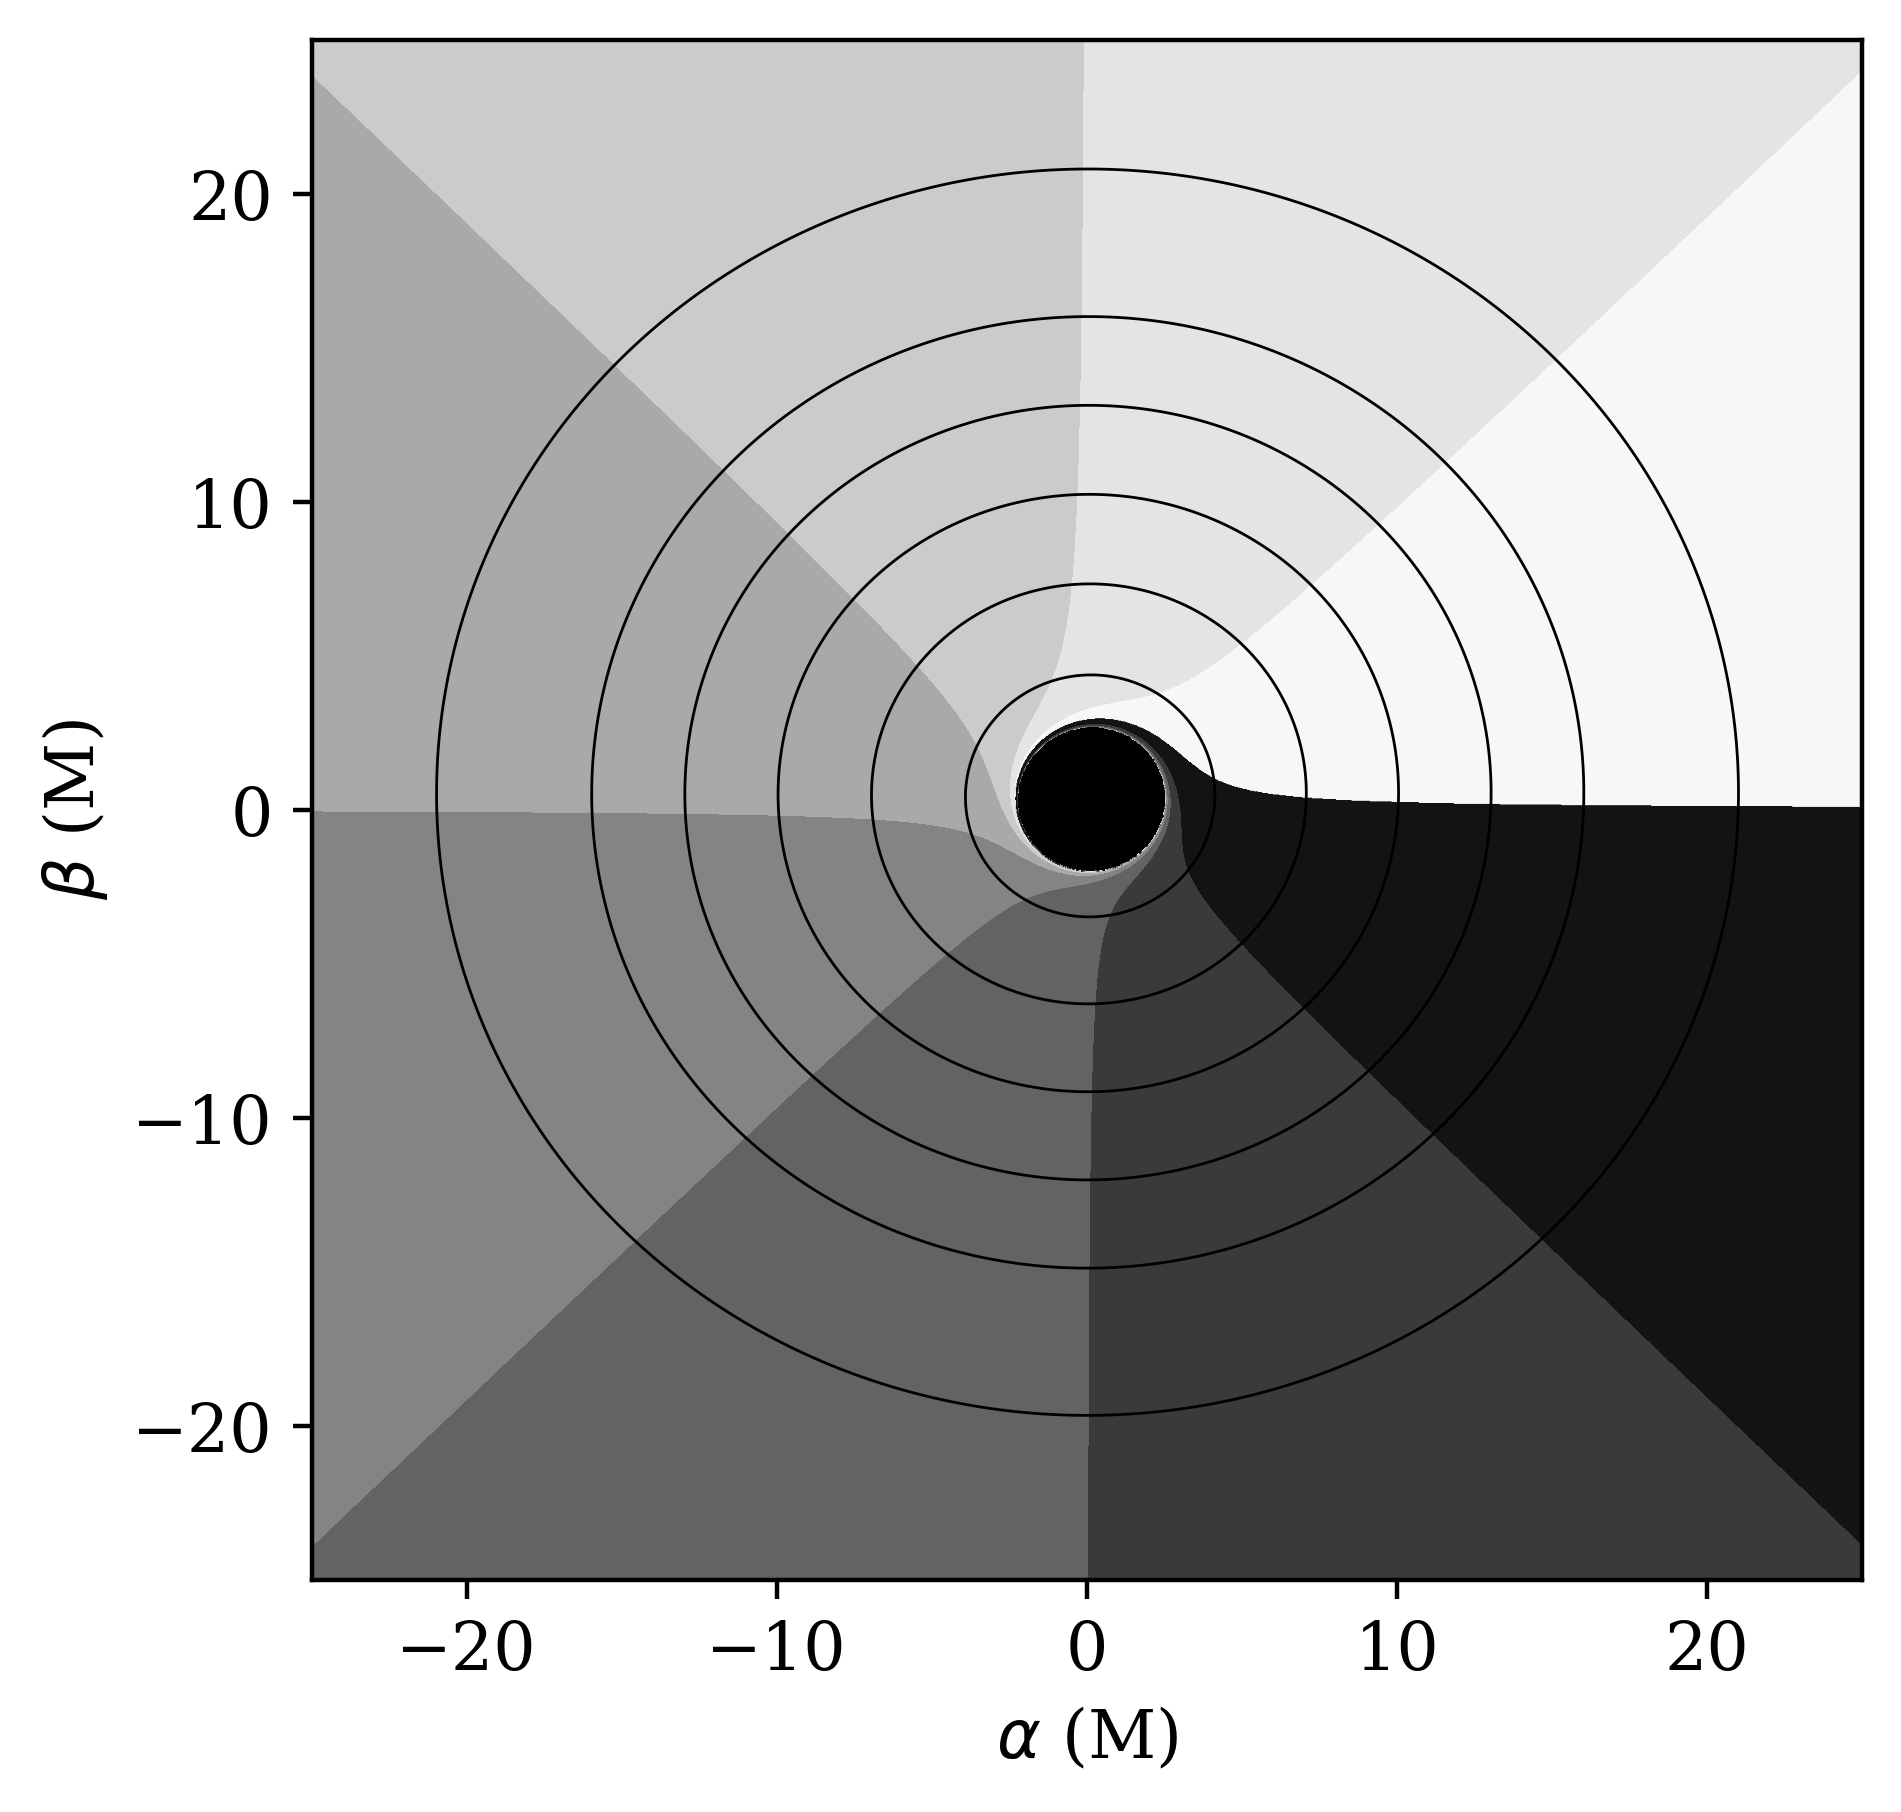

In [15]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k",linewidth=1,zorder=0)

CSphi=ax.contourf(phi0.reshape(N0,N0).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim0,lim0,-lim0,lim0],origin="lower")
CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[3,6,9,12,15,20],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='k')

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('Rays.png',dpi=400,bbox_inches='tight')

You can also plot the coordinate information of the other lensing bands.


# Calculating emission angle

In [17]:
%time !python3 magneticangle.py

Welcome to eht-imaging! v 1.2.7 

/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
Magnetic Angle
using default lband
Reading file:  /scratch/gpfs/td6241/aart/rawResults/LensingBands_a_0.9375_i_17.h5
using default rtray
Reading file:  /scratch/gpfs/td6241/aart/rawResults/Rays_a_0.9375_i_17.h5
File  /scratch/gpfs/td6241/aart/rawResults/MagneticAngle_a_0.9375_i_17.h5  created.
CPU times: user 35.4 ms, sys: 17.4 ms, total: 52.8 ms
Wall time: 3.85 s

# Reading the output of the emission angle calculation

In [21]:
fn=path + "MagneticAngle_a_%s_i_%s.h5"%(spin_case,i_case)
print("Reading file: ",fn)

h5f = h5py.File(fn,'r')

#Points for the boundary of the BH shadow
anglen0=h5f['cos2angB_n0'][:]
anglen1=h5f['cos2angB_n1'][:]
anglen2=h5f['cos2angB_n2'][:]

h5f.close()


Reading file:  /scratch/gpfs/td6241/aart/rawResults/MagneticAngle_a_0.9375_i_17.h5


In [61]:
brightparams = {
    "nu0": 90e9,  # 0 observation frequency
    "mass": (MMkg * u.kg).to(u.g).value,  # black hole mass
    "scale_height": .5,  # 2 scale_height
    "theta_b": 50.0 * (np.pi / 180),  # impact parameter, if assumed fixed
    "beta": 1.0,  # legacy (not used)
    "r_ie": 10.0,  # legacy (not used)
    "rb_0": 5,  # radius at which power laws equal base values
    "n_th0": 1.9e4,  # density power law base value
    "t_e0": 7e10,  # temperature power law base value
    "b_0": 8.131273135591028, # magnetic field power law base value
    "p_dens": -.7,  # density power law exponent
    "p_temp": -1,  # temperature power law exponent
    "p_mag": -1.5,  # magnetic power law exponent
    "nscale": .4  # Scale of Inoisy if used
}

funckeys = {
		"emodelkey" : 0, # emodelkey Emission Model choice, 0 = thermal ultrarelativistic, 1 = power law (1 is WIP)
        "bkey" : 2,      # Type of magnetic field profile , 0 = true function from brodrick and loeb eq. 3, 1 = power law with lmfit values of 0, 2 = power law from values set in brightparams
        "nnoisykey" : 0, # nnoisykey Inoisy density. 0 = no noise, 1 = noise
        "tnoisykey" : 0, # tnoisykey Inoisy temperature
        "bnoisykey" : 0, # bnoisykey Inoisy magnetic field
        "theta_bkey": 0 # Variable impact parameter, 0 for varied, 1 for fixed
}


cmd= fileloading.createIntensityArgs(brightparams,funckeys=funckeys) # create the neccesary command line argument

In [62]:
subprocess.run([cmd], shell=True)

/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'


Welcome to eht-imaging! v 1.2.7 

using default rtray
Reading file:  /scratch/gpfs/td6241/aart/rawResults/Rays_a_0.9375_i_17.h5
using default magAng
Intensity
using default lband
Reading file:  /scratch/gpfs/td6241/aart/rawResults/LensingBands_a_0.9375_i_17.h5
Reading file:  /scratch/gpfs/td6241/aart/rawResults/Rays_a_0.9375_i_17.h5
File  /scratch/gpfs/td6241/aart/rawResults/Intensity_a_0.9375_i_17_nu_9.00000e+10_mass_1.29248e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_5.0_nth0_1.9e+04_te0_7.0e+10_b0_8.131e+00_pdens_-0.7_ptemp_-1.0_pmag_-1.5_nscale_0.4_emkey_0_bkey_2_nkey_0_tnkey_0_bnkey_0_magkey_0.h5  created.


CompletedProcess(args=['python3 /home/td6241/repo/aart/radialintensity.py --nu 90000000000.0 --mass 1.2924827500377644e+43 --scaleh 0.5 --thetab 0.8726646259971648 --beta 1.0 --rie 10.0 --rb0 5 --nth0 19000.0 --te0 70000000000.0 --b0 8.131273135591028 --pdens -0.7 --ptemp -1 --pmag -1.5 --nscale 0.4 --emodelkey 0 --bkey 2 --nnoisykey 0 --tnoisykey 0 --bnoisykey 0 --thetabkey 0 --lband 0 --rtray 0 --magang 0'], returncode=0)

In [63]:
fnrays = fileloading.intensityNameNoUnits(brightparams,funckeys) # find created file na,e
    
print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

# Optically thin assumption
I0=h5f['bghts0'][:] # This implies I0 is 1 pass
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]
totalThinImage = I0 + I1 + I2

# Optical depth included RTE solution 
I2_Absorb = h5f['bghts2_absorbtion'][:]
I1_Absorb = h5f['bghts1_absorbtion'][:]
I0_Absorb = h5f['bghts0_absorbtion'][:]
Absorbtion_Image =h5f['bghts_full_absorbtion'][:]
h5f.close()

Reading file:  /scratch/gpfs/td6241/aart/rawResults/Intensity_a_0.9375_i_17_nu_9.00000e+10_mass_1.29248e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_5.0_nth0_1.9e+04_te0_7.0e+10_b0_8.131e+00_pdens_-0.7_ptemp_-1.0_pmag_-1.5_nscale_0.4_emkey_0_bkey_2_nkey_0_tnkey_0_bnkey_0_magkey_0.h5


Text(0.5, 1.0, 'Assumed optically thin')

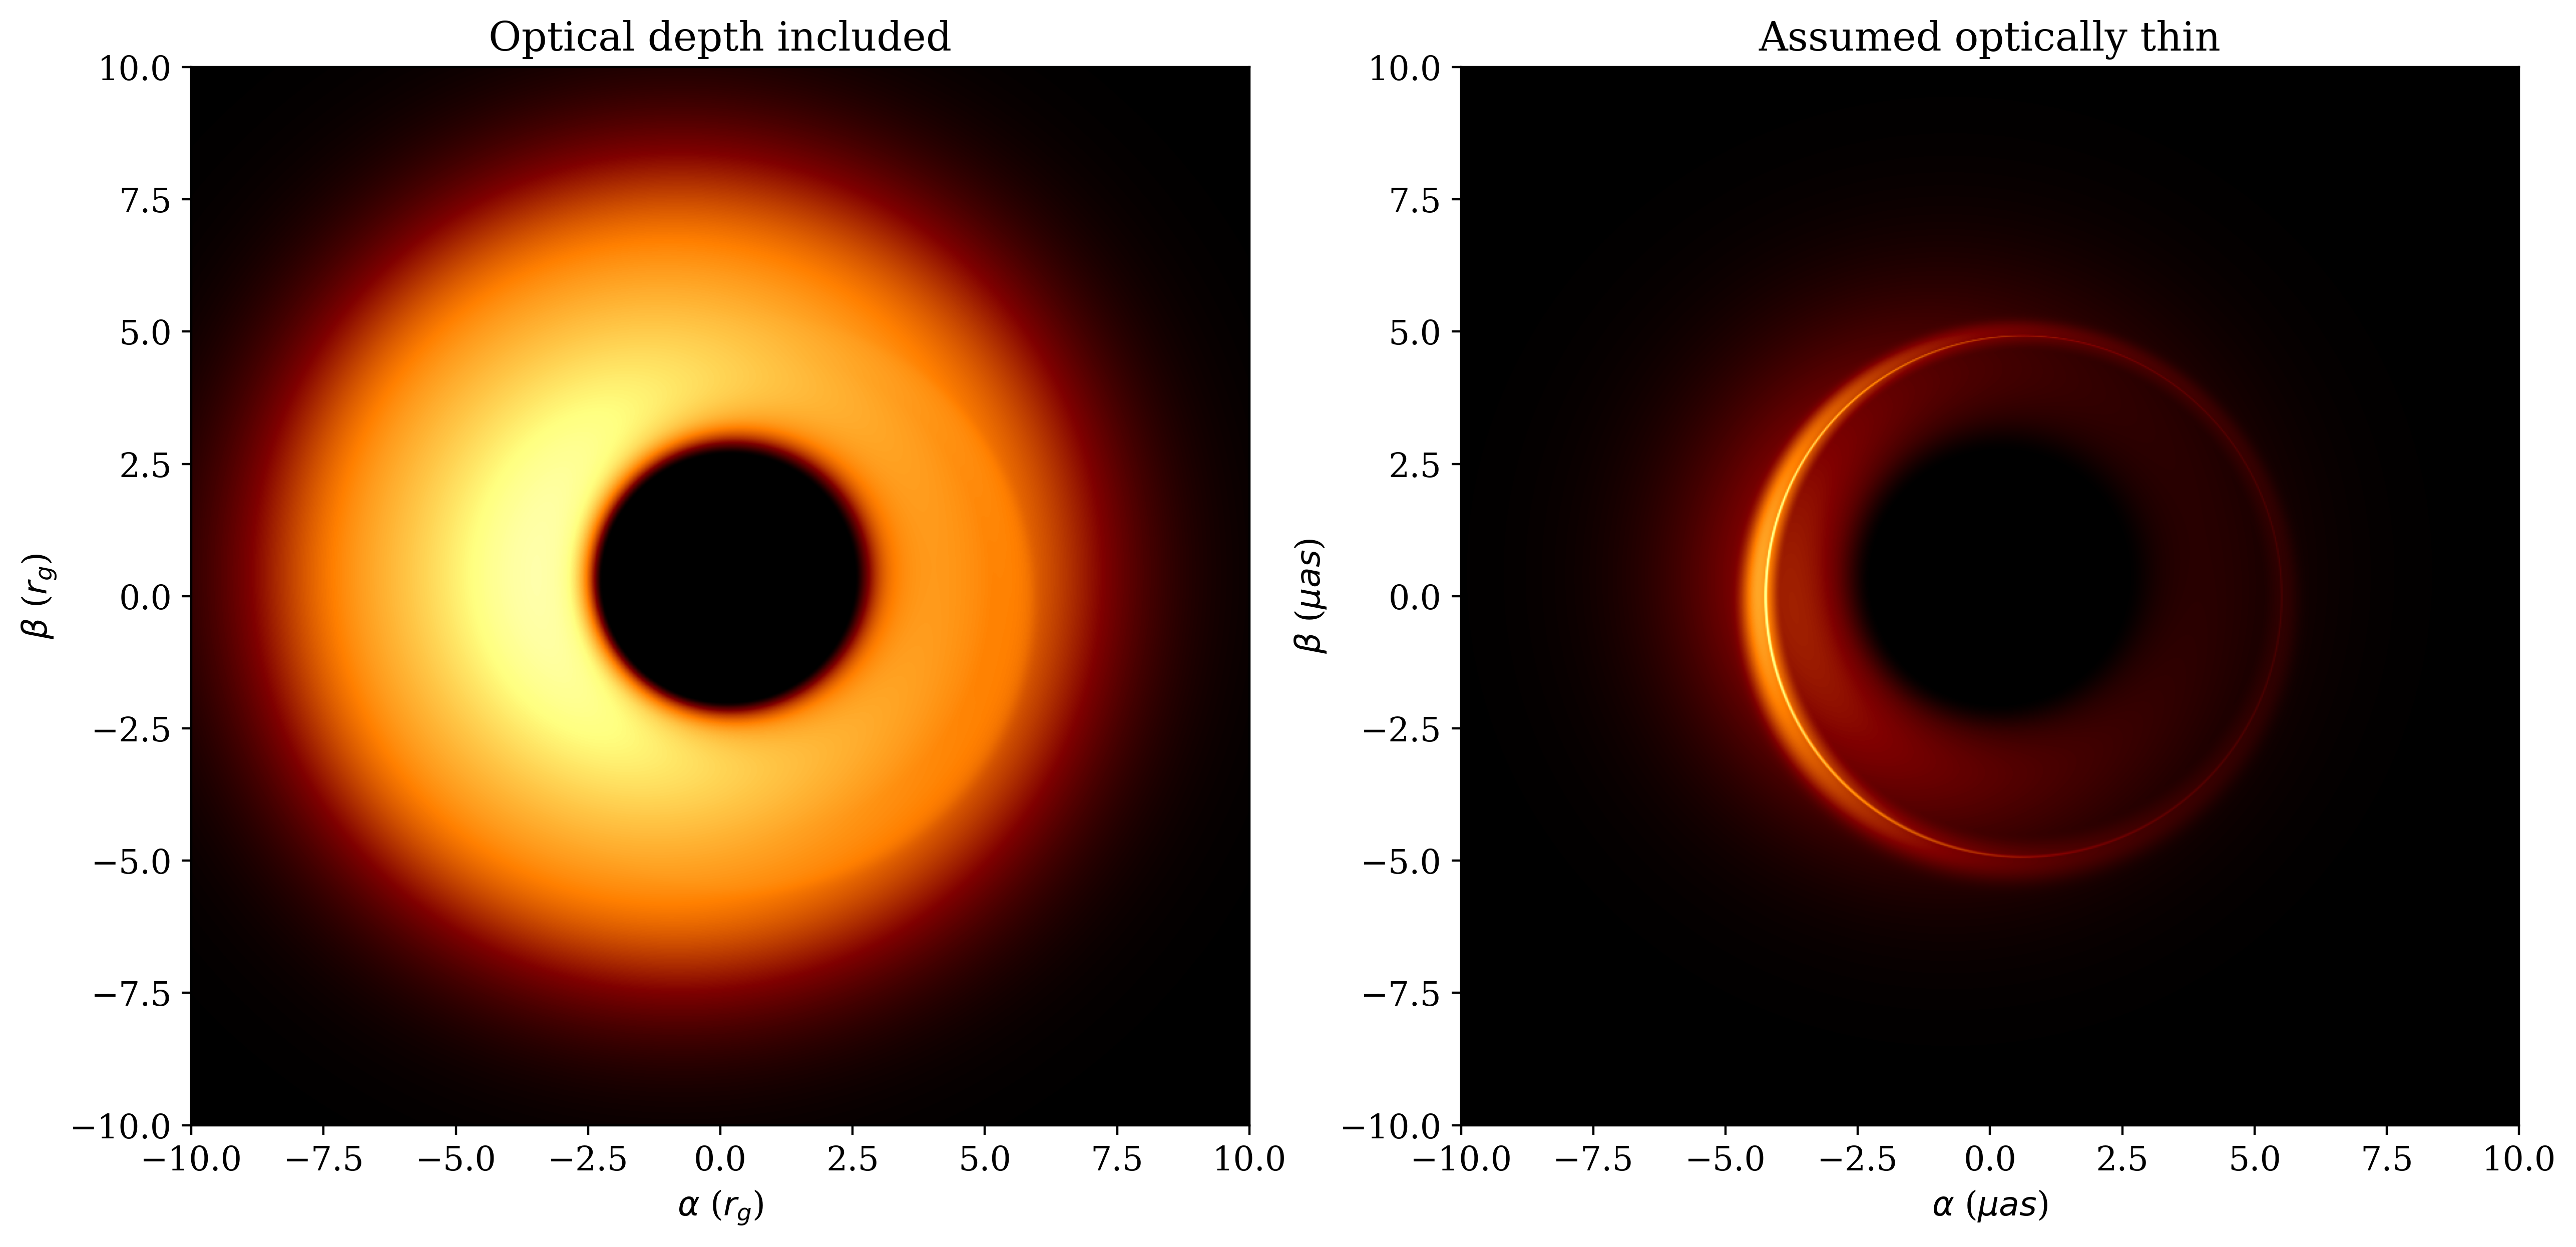

In [71]:

# vmin = np.nanmax(I0+I1+I2)*.5
fig, (ax0,ax1) = plt.subplots(1,2,figsize=[15,7],dpi=400)

im0 = ax0.imshow(Absorbtion_Image, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],vmax=np.nanmax(Absorbtion_Image)*1.2)

ax0.set_xlim(-10,10) # units of M
ax0.set_ylim(-10,10) 
    
    
ax0.set_xlabel(r"$\alpha$"+" "+r"($r_g$)")
ax0.set_ylabel(r"$\beta$"+" "+r"($r_g$)")
ax0.set_title("Optical depth included")

im1 = ax1.imshow(totalThinImage, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],vmax=np.nanmax(totalThinImage)*1.2)

ax1.set_xlim(-10,10) # units of M
ax1.set_ylim(-10,10) 
    
    
ax1.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax1.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")
ax1.set_title("Assumed optically thin")

# Inoisy Included

In [76]:
brightparams = {
    "nu0": 90e9,  # 0 observation frequency
    "mass": (MMkg * u.kg).to(u.g).value,  # black hole mass
    "scale_height": .5,  # 2 scale_height
    "theta_b": 50.0 * (np.pi / 180),  # impact parameter, if assumed fixed
    "beta": 1.0,  # legacy (not used)
    "r_ie": 10.0,  # legacy (not used)
    "rb_0": 5,  # radius at which power laws equal base values
    "n_th0": 1.9e4,  # density power law base value
    "t_e0": 7e10,  # temperature power law base value
    "b_0": 8.131273135591028, # magnetic field power law base value
    "p_dens": -.7,  # density power law exponent
    "p_temp": -1,  # temperature power law exponent
    "p_mag": -1.5,  # magnetic power law exponent
    "nscale": .2  # Scale of Inoisy if used
}

funckeys = {
		"emodelkey" : 0, # emodelkey Emission Model choice, 0 = thermal ultrarelativistic, 1 = power law (1 is WIP)
        "bkey" : 2,      # Type of magnetic field profile , 0 = true function from brodrick and loeb eq. 3, 1 = power law with lmfit values of 0, 2 = power law from values set in brightparams
        "nnoisykey" : 1, # nnoisykey Inoisy density. 0 = no noise, 1 = noise
        "tnoisykey" : 1, # tnoisykey Inoisy temperature. 0 = no noise, 1 = noise
        "bnoisykey" : 1, # bnoisykey Inoisy magnetic field. 0 = no noise, 1 = noise
        "theta_bkey": 0 # Variable impact parameter, 0 for varied, 1 for fixed
}


cmd= fileloading.createIntensityArgs(brightparams,funckeys=funckeys) # create the neccesary command line argument

In [77]:
subprocess.run([cmd], shell=True)

/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'


Welcome to eht-imaging! v 1.2.7 

using default rtray
Reading file:  /scratch/gpfs/td6241/aart/rawResults/Rays_a_0.9375_i_17.h5
using default magAng
Intensity
using default lband
Reading file:  /scratch/gpfs/td6241/aart/rawResults/LensingBands_a_0.9375_i_17.h5
Reading file:  /scratch/gpfs/td6241/aart/rawResults/Rays_a_0.9375_i_17.h5
File  /scratch/gpfs/td6241/aart/rawResults/Intensity_a_0.9375_i_17_nu_9.00000e+10_mass_1.29248e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_5.0_nth0_1.9e+04_te0_7.0e+10_b0_8.131e+00_pdens_-0.7_ptemp_-1.0_pmag_-1.5_nscale_0.2_emkey_0_bkey_2_nkey_1_tnkey_1_bnkey_1_magkey_0.h5  created.


CompletedProcess(args=['python3 /home/td6241/repo/aart/radialintensity.py --nu 90000000000.0 --mass 1.2924827500377644e+43 --scaleh 0.5 --thetab 0.8726646259971648 --beta 1.0 --rie 10.0 --rb0 5 --nth0 19000.0 --te0 70000000000.0 --b0 8.131273135591028 --pdens -0.7 --ptemp -1 --pmag -1.5 --nscale 0.2 --emodelkey 0 --bkey 2 --nnoisykey 1 --tnoisykey 1 --bnoisykey 1 --thetabkey 0 --lband 0 --rtray 0 --magang 0'], returncode=0)

In [78]:
fnrays = fileloading.intensityNameNoUnits(brightparams,funckeys) # find created file na,e
    
print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

# Optically thin assumption
I0=h5f['bghts0'][:] # This implies I0 is 1 pass
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]
totalThinImage = I0 + I1 + I2

# Optical depth included RTE solution 
I2_Absorb = h5f['bghts2_absorbtion'][:]
I1_Absorb = h5f['bghts1_absorbtion'][:]
I0_Absorb = h5f['bghts0_absorbtion'][:]
Absorbtion_Image =h5f['bghts_full_absorbtion'][:]
h5f.close()

Reading file:  /scratch/gpfs/td6241/aart/rawResults/Intensity_a_0.9375_i_17_nu_9.00000e+10_mass_1.29248e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_5.0_nth0_1.9e+04_te0_7.0e+10_b0_8.131e+00_pdens_-0.7_ptemp_-1.0_pmag_-1.5_nscale_0.2_emkey_0_bkey_2_nkey_1_tnkey_1_bnkey_1_magkey_0.h5


Text(0.5, 1.0, 'Assumed optically thin')

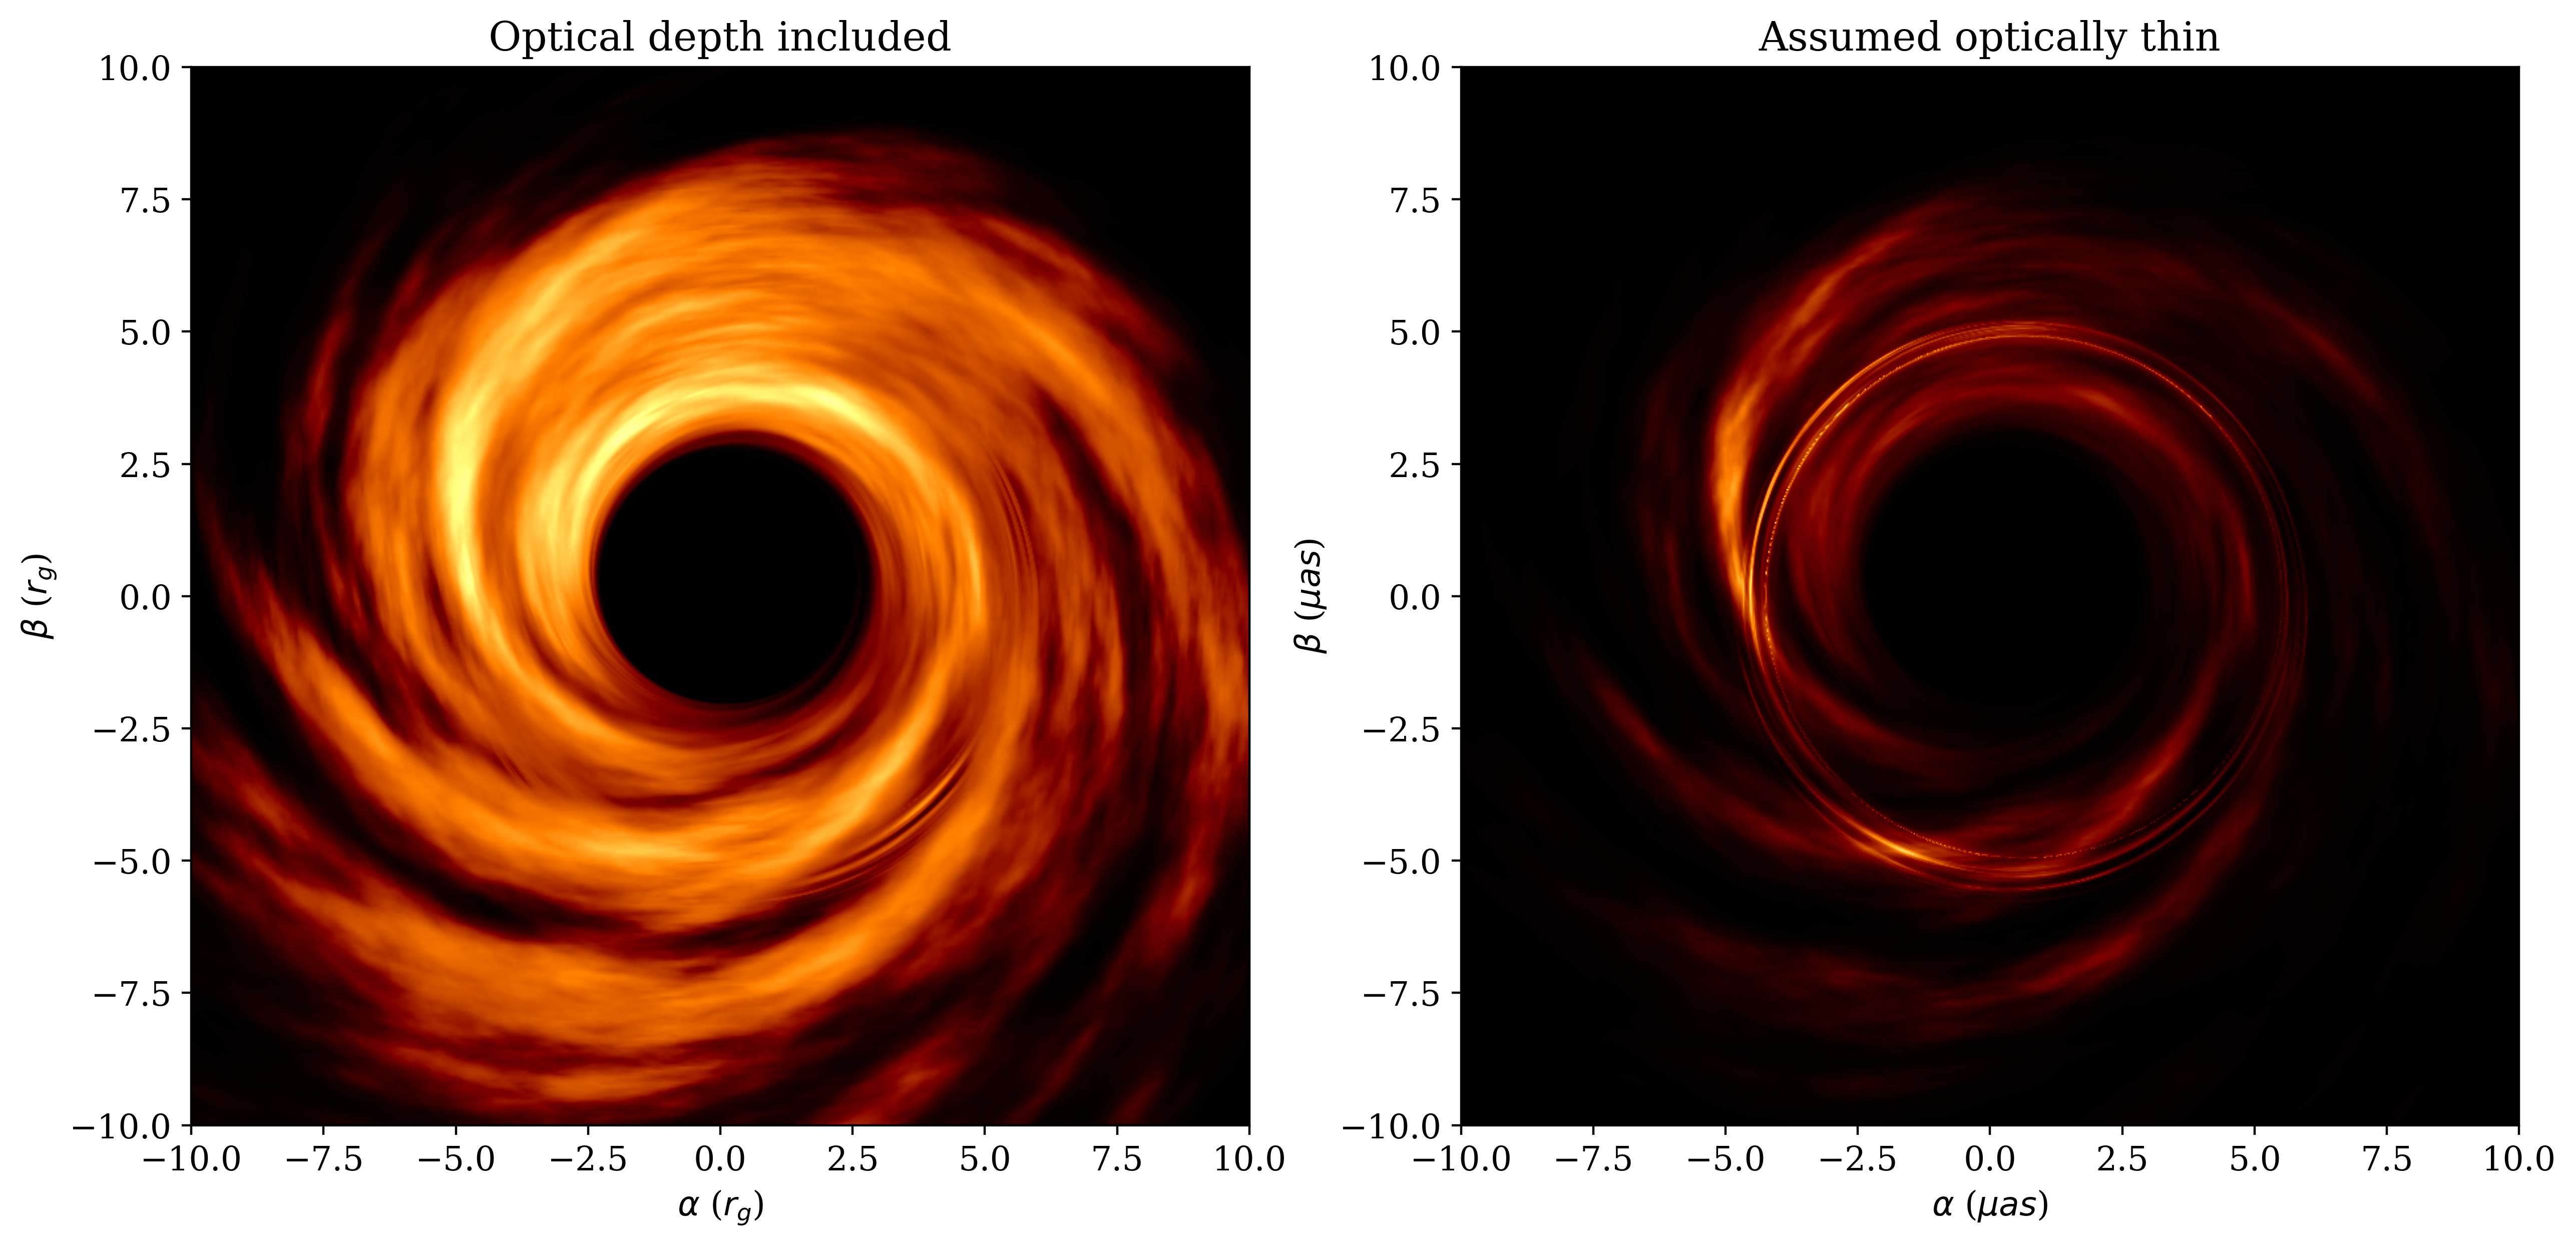

In [ ]:

# vmin = np.nanmax(I0+I1+I2)*.5
fig, (ax0,ax1) = plt.subplots(1,2,figsize=[15,7],dpi=400)

im0 = ax0.imshow(Absorbtion_Image, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],vmax=np.nanmax(Absorbtion_Image)*1.2)

ax0.set_xlim(-10,10) # units of M
ax0.set_ylim(-10,10) 
    
    
ax0.set_xlabel(r"$\alpha$"+" "+r"($r_g$)")
ax0.set_ylabel(r"$\beta$"+" "+r"($r_g$)")
ax0.set_title("Optical depth included")

im1 = ax1.imshow(totalThinImage, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],vmax=np.nanmax(totalThinImage)*1.2)

ax1.set_xlim(-10,10) # units of M
ax1.set_ylim(-10,10) 
    
    
ax1.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax1.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")
ax1.set_title("Assumed optically thin")